# Labolatorium 2
Zadania 1 i 2 są zaimplementowane w pliku lab2_first2.py
### Zadanie 1 - Algorytm Gaussa-Jordana

In [1]:
from lab2_first2 import gauss_solve
from lab2_first2 import lu_factor
import time
import numpy as np
import matplotlib.pyplot as plt

Porównanie czasu wykonania mojej implementacji i fuckcji bibliotecznej numpy.linalg.solve

In [5]:

random_matrix_sizes = [500, 750, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 5000]
my_func_times = []
lib_func_times = []
for i in random_matrix_sizes:
    print(i, end=" ")
    left = np.random.uniform(low=1.0, high = 1000.0, size=(i, i))
    right = np.random.uniform(low=1.0, high = 1000.0, size=(i,))

    start = time.process_time()
    sol1 = gauss_solve(left, right)
    my_end = time.process_time()
    sol2 = np.linalg.solve(left, right)
    np_end = time.process_time()

    my_func_times.append(my_end - start)
    lib_func_times.append(np_end - my_end)

500 750 1000 1500 2000 2500 3000 3500 4000 5000 

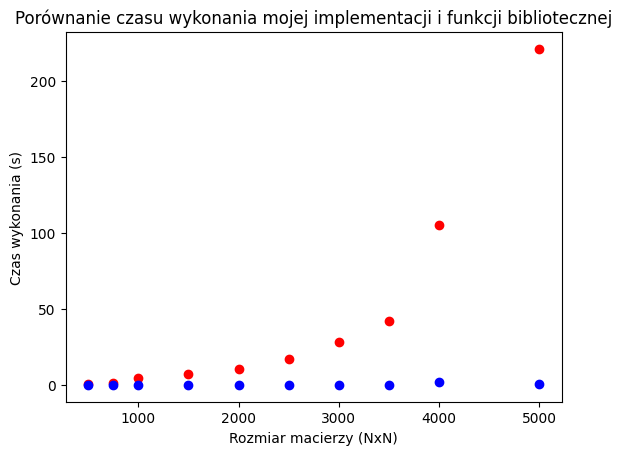

In [10]:
plt.plot(random_matrix_sizes, my_func_times, 'ro')
plt.plot(random_matrix_sizes, lib_func_times, 'bo')
plt.xlabel("Rozmiar macierzy (NxN)")
plt.ylabel("Czas wykonania (s)")
plt.title("Porównanie czasu wykonania mojej implementacji i funkcji bibliotecznej")
plt.show()

Jak widać moja implementacja jest wolniejsza od impelentacji bibliotecznej. Może być to związane że implementacja z biblioteki numpy kożysta z szybszego algorytmu lub fakt że ta fukcja jest napisana w języku C++ i przez bycie skompilowaną wcześniej zyskuje na wydajności.

### Zadanie 2 - Faktoryzacja LU

Sprawdzenie poprawności mojej implementacji przez sprawdzenie normy macieży $|A - LU|$.

In [14]:
for s in random_matrix_sizes:
    matrix = np.random.uniform(low=1.0, high = 1000.0, size=(s, s))
    copy = matrix.copy()
    LU = lu_factor(matrix)
    L = np.zeros(shape=LU.shape)
    U = np.zeros(shape=LU.shape)
    for i in range(LU.shape[0]):
        L[i,:i] = LU[i,:i]
        L[i,i] = 1
        U[i, i:] = LU[i, i:]
    print(s,np.linalg.matrix_norm(copy - np.matmul(L, U)))

500 6.144012080608352e-08
750 7.614729856608907e-07
1000 2.1140020348549448e-07
1500 1.3204252485672957e-06
2000 1.1251833205518289e-05
2500 3.61998900530579e-06
3000 3.062301478254872e-06
3500 6.627235636149727e-06
4000 6.060014156601309e-06
5000 0.00046898019903887054


Wszyskie normy są bliskie zeru czyli moja implementacja jest poprawna. Normy mogą być lekko różne od zera ponieważ przy takich rozmiarach macierzy błąd ze względu na arytmetykę zmiennoprzecinkową staje się większy.